In [19]:
!rm ../data/dataset.csv
!cat ../data/en/hasoc2019/hasoc2019.csv >> ../data/dataset.csv
!cat ../data/en/hate_speech_icwsm18/nhsm.csv >> ../data/dataset.csv
!cat ../data/en/hate-speech-and-offensive-language/t_davidson.csv >> ../data/dataset.csv
!cat ../data/en/ousidhoum-etal-multilingual-hate-speech-2019/ousidhoum.csv >> ../data/dataset.csv
!cat ../data/en/semeval2019/semeval2019.csv >> ../data/dataset.csv

In [78]:
# !pip install matplotlib
!pip install ekphrasis

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 80 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 176 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 3.0 MB/s  eta 0:00:01
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82843 sha256=511ea3b39e36e25ef92d41a463c6086b4cfc0d64a7f58fc0ddc8c15f77071f85
  Stored in directory: /homes/nv304/.cache/pip/wheels/4d/80/3d/a326a4bc40633d1e10bce871e28e5e3ff4b4d0ea37cd0a0543
  Created wheel for ftfy: filename=ftfy-5.8-py3-none-any.whl size=45612 sha256=86b2da1a2ef5fba2ff2e480d86696b2a2f379898f513e858794a983d016f6cee
  Stored in directory: /homes/nv304/.cache/pip/wheels/0f/35/f5/eb0a6ada2f64da8852637df14e12c7eb94f26c42546865d83d
Successfully built ekphrasis ftfy
You should consider upgrading via the '/homes/nv

In [71]:
import matplotlib.pyplot as plt
import re
import pandas as pd

In [63]:
df_en = pd.read_csv('../data/dataset.csv')
print(df_en.shape)
df_en.drop(df_en[(df_en['text_id'] == 'text_id')].index,inplace=True)
df_en.drop(df_en[(df_en['hate'] == 'HS')].index,inplace=True)
df_en.rename(columns={'hate':'class'},inplace=True)
print(df_en.describe())

(50386, 3)
             text_id          text  class
count          50381         50381  50381
unique         49524         50000      3
top     hasoc_en_512  @user retard      2
freq               2             5  22898


Size of dataset: 50381
Hateful (class) = 1: 10738 ( 21.313590440840795 %)
Offensive (class) = 2: 22898 ( 45.44967348802128 %)

****

**Hateful examples (class) = 1
["A gangster sets out to fulfill his father’s dream of becoming a doctor.    Doctor's in #WestBengal be like #munna_bhai_MBBS    #DoctorsFightBack #DoctorsStrike #DoctorsUnderOppression   @MamataOfficial https://t.co/lZQcStQ2Md", 'That’s not white supremacy though is it. That means whites thinking AND ACTING as though they are superior to others. What these Jew/Muslim joint actions are concerned with is protecting stuff like Halal/Kosher, circumcision and the right to wear religious garb. 1/2', 'Sit his ass down!  Tape his fingers and duct-tape his mouth.  Then throw him in a cage with the immigrants.  Problem solved!  Such a vision.  America, Free of Trump.  Darn, I just woke up.  Dems will do nothing.  #FuckTrump #FuckGOP #FuckCivility #ImpeachmentInquiryNow https://t.co/gU8oBArfo8', 'Congress abusive language towards PM M

<AxesSubplot:xlabel='class'>

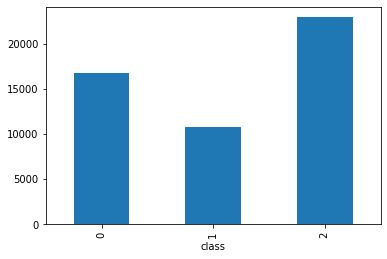

In [66]:
total = df_en.shape[0]
gp = df_en.groupby(['class'])['text_id'].count()
hate = gp[1]
offensive = gp[2]
print("Size of dataset:", total)
print("Hateful (class) = 1:", hate, "(",hate/total*100,"%)")
print("Offensive (class) = 2:",offensive, "(",offensive/total*100,"%)")
print("\n****\n")
print('**Hateful examples (class) = 1')
print(list(df_en[df_en['class']=="1"]['text'][0:10]))

print('\n**Offensive examples (class) = 2')
print(list(df_en[df_en['class']=="2"]['text'][0:10]))
gp.plot(kind='bar')


### Pre process text

In [80]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /homes/nv304/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /homes/nv304/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


In [81]:
df_en['clean_text'] = df_en.apply(lambda x: " ".join(text_processor.pre_process_doc(x.text)),axis=1)

In [77]:
print(df_en['text'][100])
print(df_en['clean_text'][100])

Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams  https://t.co/S2akvvDDlY
Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams 


In [83]:
print(df_en['text'][1000])
print(df_en['clean_text'][1000])

Some people, by way of association (and assassination), die quicker than they should.  Whereas we foretold a mighty dragging, her dragging ended in her death.  Yes, she will die -- never be the same again.  #dirtyniggr #markbathompson #blight #demon #murderer #thief #nataliewatts
some people , by way of association ( and assassination ) , die quicker than they should . whereas we foretold a mighty dragging , her dragging ended in her death . yes , she will die - - never be the same again . <hashtag> dirty niggr </hashtag> <hashtag> mark ba thompson </hashtag> <hashtag> blight </hashtag> <hashtag> demon </hashtag> <hashtag> murderer </hashtag> <hashtag> thief </hashtag> <hashtag> natalie watts </hashtag>
